#**Fraud Detection**

**Problem Statement : The main aim of this project is to distinguish between legitimate and fraudulent behavior. It involves identifying and preventing deceptive activities within financial transaction or systems.**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score, roc_curve, recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

In [ ]:
data=pd.read_csv('/content/Fraud detection dataset_1.csv')
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

**In this dataset, there are 284807 Rows and 31 Columns.**

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#Data Information

1. **Time:** It represents the number of seconds elasped between the current transaction and the first transaction recorded in the dataset.

2. **Amount:** It denotes the transaction amount linked with each transaction.

3. **Class:** It serves as a label indicating the nature of the transaction. It takes a value of 1 for fraudulent transactions and 0 for legitimate ones.

4. **V1-V28:** It may de result of a PCA Dimensionality reduction to protect user identifies and sensitive features.

In [ ]:
#Count the number of fraudulent and non-fraudulent transactions
fraud_count = data['Class'].sum()
non_fraud_count = len(data)-fraud_count
print('Number of Fraudulent Transactions:',fraud_count)
print('Number of Non-Fraudulent Transactions:',non_fraud_count)

Number of Fraudulent Transactions: 492
Number of Non-Fraudulent Transactions: 284315


Handling the Imbalanced Data

In [ ]:
#Separate the fraudulent and non-fraudulent transactions
fraudulent_transactions = data[data['Class']==1]
non_fraudulent_transactions = data[data['Class']==0]

#Resample non-fraudulent transaction without replacement to match
# the number of instances in fraudulent class
resampled_non_fraudulent_transactions = non_fraudulent_transactions.sample(
    n = fraud_count, random_state =34
                                     )

#Combine the resampled non-fraudulent transactions with original fraudulent transactions
balanced_data = pd.concat([fraudulent_transactions,
                            resampled_non_fraudulent_transactions])

#Shuffle the DataFrame to randomize the order of transactions
balanced_data = balanced_data.sample(frac = 1, random_state=34).reset_index(drop=True)

#Verify the class distribution in the balanced dataset
print(balanced_data['Class'].value_counts())

0    492
1    492
Name: Class, dtype: int64


Splitting the Data

In [ ]:
#Split the data into features and target variable
X = balanced_data.drop('Class',axis=1)
y = balanced_data['Class']

#split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state=34)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp,y_temp,
                                   test_size = 0.5,random_state =34)

In [ ]:
#Display class distribution for each dataset
print("Training Set:")
print("Fraudulent transactions(Class 1):",y_train.sum(),"/",len(y_train))
print("Non-Fraudulent transactions(Class 0):",len(y_train)-y_train.sum(),
      "/",len(y_train))

print("\nDevelopment Set:")
print("Fraudulent transactions(Class 1):",y_dev.sum(),"/",len(y_dev))
print("Non-Fraudulent transactions(class 0):",len(y_dev)-y_dev.sum(),"/",len(y_dev))

print("\nTesting Set:")
print("Fraudulent transactions(Class 1):", y_test.sum(),"/",len(y_test))
print("Non-fraudulent transactions(Class 0):",len(y_test)-y_test.sum(),"/",len(y_test))

Training Set:
Fraudulent transactions(Class 1): 297 / 590
Non-Fraudulent transactions(Class 0): 293 / 590

Development Set:
Fraudulent transactions(Class 1): 96 / 197
Non-Fraudulent transactions(class 0): 101 / 197

Testing Set:
Fraudulent transactions(Class 1): 99 / 197
Non-fraudulent transactions(Class 0): 98 / 197


In [ ]:
#Define a function to adjust classification threshold to get desired recall
def adjust_threshold(y_prob, recall_target=1):
  fpr,tpr, thresholds = roc_curve(y_test, y_prob[:,1])
  target_idx = np.argmax(tpr >= recall_target)
  threshold = thresholds[target_idx]
  return np.where(y_prob[:,1] > threshold,1,0)

Training and Evaluating Classifiers

1. Random Forest

2. Gradient Boosting

3. K-Nearest Neighbors(KNN)

4. Support Vector Classifier(SVC)

5. Logistic Regression

In [ ]:
# Random Forest Classifier
def train_random_forest(X_train,y_train,X_dev,y_dev):
  rf = RandomForestClassifier(random_state=34)
  param_grid = {
      'n_estimators':[50,100,200],
      'max_depth':[None,10,20],
      'min_samples_split':[2,5,10]
  }

  grid_search = GridSearchCV(rf, param_grid, scoring='recall',n_jobs=-1)
  grid_search.fit(X_dev,y_dev)
  best_rf = grid_search.best_estimator_
  best_rf.fit(X_train,y_train)
  return best_rf

 # best_rf = train_random_forest(X_train,y_train,X_dev,y_dev)
  #rf_score = best_rf.score(X_test,y_test)
  #print("Random Forest Accuracy:",rf_score)

In [ ]:
  best_rf = train_random_forest(X_train,y_train,X_dev,y_dev)
  rf_score = best_rf.score(X_test,y_test)
  print("Random Forest Accuracy:",rf_score)

Random Forest Accuracy: 0.949238578680203


In [ ]:
#Gradient Boosting Classifier
def train_gradient_boosting(X_train,y_train,X_dev,y_dev):
  gb = GradientBoostingClassifier(random_state=34)
  param_grid = {
      'n_estimators':[50,100,200],
      'learning_rate':[0.1,0.05,0.01],
      'max_depth':[3,4,5]
  }

  grid_search = GridSearchCV(gb,param_grid,scoring='recall',n_jobs=-1)
  grid_search.fit(X_dev,y_dev)
  best_gb = grid_search.best_estimator_
  best_gb.fit(X_train,y_train)
  return best_gb

In [ ]:
best_gb = train_gradient_boosting(X_train,y_train,X_dev,y_dev)
gb_score = best_gb.score(X_test,y_test)
print("Gradient Boosting Accuracy:",gb_score)

Gradient Boosting Accuracy: 0.9390862944162437


In [ ]:
#K Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def train_knn(X_train,y_train,X_dev,y_dev):
  knn = KNeighborsClassifier()
  param_grid ={
      'n_neighbors':[3,5,7],
      'weights':['uniform','distance'],
      'algorithm':['auto','ball_tree','kd_tree','brute']
  }

  grid_search = GridSearchCV(knn, param_grid,scoring = 'recall',n_jobs=-1)
  grid_search.fit(X_dev,y_dev)
  best_knn = grid_search.best_estimator_
  best_knn.fit(X_train,y_train)
  return best_knn

In [ ]:
best_knn = train_knn(X_train,y_train,X_dev,y_dev)
knn_score = best_knn.score(X_test,y_test)
print("KNN Accuracy:",knn_score)

KNN Accuracy: 0.6091370558375635


In [ ]:
#Logistic Regression Classifier
def train_logistic_regression(X_train,y_train,X_dev,y_dev):
  lr= LogisticRegression(random_state=34,solver='lbfgs',max_iter=1000)
  lr.fit(X_train,y_train)
  param_grid = {
      'C':[0.1,1,10],
      'penalty':['12']
  }

  grid_search = GridSearchCV(lr,param_grid,cv=5,scoring='recall',n_jobs=-1)
  grid_search.fit(X_dev,y_dev)
  best_lr = grid_search.best_estimator_
  return best_lr


In [ ]:
#Support Vector Classifier(SVC)
def train_svc(X_train,y_train,X_dev,y_dev):
  scaler = StandardScaler()
  warnings.filterwarnings("ignore",message="X has feature names, but SVC was fitted without feature names")
  X_train_scaled = scaler.fit_transform(X_train)
  X_dev_scaled = scaler.transform(X_dev)

  svc = SVC(random_state =34,probability=True)
  svc.fit(X_train_scaled,y_train)

  param_grid = {
      'C':[0.1,1,10],
      'gamma':['scale','auto'],
      'kernel':['linear','poly','rbf','sigmoid']

  }
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search = GridSearchCV(svc,param_grid, cv=5, scoring='recall',n_jobs=-1)
    grid_search.fit(X_dev_scaled,y_dev)
    best_svc = grid_search.best_estimator_
    return best_svc

In [ ]:
best_svc = train_svc(X_train,y_train,X_dev,y_dev)
svc_score = best_svc.score(X_test,y_test)
print("Support Vector Classifier Accuracy:",svc_score)

Support Vector Classifier Accuracy: 0.5025380710659898


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score,f1_score
from tabulate import tabulate

from sklearn.metrics import classification_report,roc_auc_score,precision_score,recall_score,f1_score
from tabulate import tabulate
import warnings

def generate_report(models,X_test,y_test):
  report_data = []
  for name,model in models.items():
    y_pred = model.predict(X_test)
    try:

      with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        report = classification_report(y_test,y_pred,output_dict=True)

    except Warning as w:
      print(f"Warning encountered for model {name}:{str(w)}")

      report = {}

    auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    report_data.append({
        "Model": name,
        "Precision": precision_score(y_test,y_pred),
        "Recall": recall_score(y_test,y_pred),
        "F1-Score": f1_score(y_test,y_pred),
        "Support":np.sum(y_pred),
        "AUC":auc
    })
    return tabulate(report_data, headers="keys", tablefmt="pretty")
   # return tabulate(report_data,headers = "Keys",tablefmt = "pretty")

input_models = {'Random Forest': best_rf,'Gradient Boosting':best_gb,'KNN':best_knn,
                'SVC':best_svc}

report_table = generate_report(input_models,X_test,y_test)
print("Classification Report Table:")
print(report_table)

Classification Report Table:
+---------------+--------------------+--------------------+----------+---------+--------------------+
|     Model     |     Precision      |       Recall       | F1-Score | Support |        AUC         |
+---------------+--------------------+--------------------+----------+---------+--------------------+
| Random Forest | 0.9405940594059405 | 0.9595959595959596 |   0.95   |   101   | 0.9879406307977737 |
+---------------+--------------------+--------------------+----------+---------+--------------------+


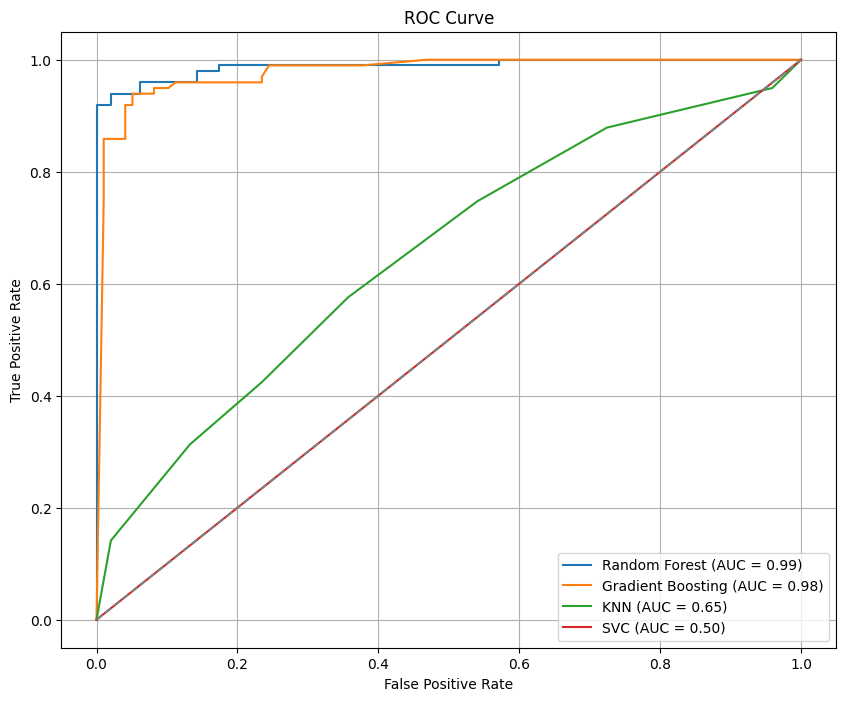

In [ ]:
def plot_roc(input_models, input_model_names, X_test, y_test):
    # Suppress warnings
    warnings.filterwarnings("ignore")

    plt.figure(figsize=(10, 8))
    for model, name in zip(input_models, input_model_names):
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc([best_rf, best_gb, best_knn, best_svc,],
         ['Random Forest', 'Gradient Boosting', 'KNN', 'SVC',],
         X_test, y_test)